## Multiple Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv(r"C:\Users\suraj\OneDrive\Desktop\Data Science\Datasets\Mumbai_house_price.csv")

In [3]:
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


## Data Cleaning

In [4]:
# Remove the unnecessary columns
df.drop(['Unnamed: 0','New/Resale'],axis = 1 ,inplace = True)

In [5]:
df.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1,1,0,0,0,0


### Conclusion - 
- I think New/Resale column is not useful for our model 

## General Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   Gymnasium             6347 non-null   int64 
 5   Lift Available        6347 non-null   int64 
 6   Car Parking           6347 non-null   int64 
 7   Maintenance Staff     6347 non-null   int64 
 8   24x7 Security         6347 non-null   int64 
 9   Children's Play Area  6347 non-null   int64 
 10  Clubhouse             6347 non-null   int64 
 11  Intercom              6347 non-null   int64 
 12  Landscaped Gardens    6347 non-null   int64 
 13  Indoor Games          6347 non-null   int64 
 14  Gas Connection        6347 non-null   int64 
 15  Jogging Track         6347 non-null   

In [7]:
df.shape

(6347, 17)

In [8]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [9]:
df.dtypes

Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Gymnasium                int64
Lift Available           int64
Car Parking              int64
Maintenance Staff        int64
24x7 Security            int64
Children's Play Area     int64
Clubhouse                int64
Intercom                 int64
Landscaped Gardens       int64
Indoor Games             int64
Gas Connection           int64
Jogging Track            int64
Swimming Pool            int64
dtype: object

In [10]:
df.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

### Insight - 
- The dataset contain 6347 rows and 17 columns.
- Each column is integer except Location columns which is object data type
- There is no null value

And also the dataset is in good shape

## Statistics Summary

In [11]:
df.describe()

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,2.015943e+07,556.375703,0.863304,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+06,650.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.500000e+06,905.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# checking house price
df['Price'].min(), df['Price'].max(), np.round(df['Price'].mean())

(2000000, 420000000, 15154014.0)

In [13]:
# checking the area(sqft) of the house
df['Area'].min(), df['Area'].max(), np.round(df['Area'].mean())

(200, 8511, 1004.0)

In [14]:
# checking the value counts of some feature

for col in df.columns[3:]:
    print(f"The value counts of {col}")
    print(f"{df[col].value_counts()}\n\n")

The value counts of No. of Bedrooms
2    2601
1    2307
3    1201
4     190
5      39
6       7
7       2
Name: No. of Bedrooms, dtype: int64


The value counts of Gymnasium
1    3690
0    2657
Name: Gymnasium, dtype: int64


The value counts of Lift Available
1    5087
0    1260
Name: Lift Available, dtype: int64


The value counts of Car Parking
1    3573
0    2774
Name: Car Parking, dtype: int64


The value counts of Maintenance Staff
0    4561
1    1786
Name: Maintenance Staff, dtype: int64


The value counts of 24x7 Security
1    3573
0    2774
Name: 24x7 Security, dtype: int64


The value counts of Children's Play Area
1    3550
0    2797
Name: Children's Play Area, dtype: int64


The value counts of Clubhouse
0    3197
1    3150
Name: Clubhouse, dtype: int64


The value counts of Intercom
0    3270
1    3077
Name: Intercom, dtype: int64


The value counts of Landscaped Gardens
0    4058
1    2289
Name: Landscaped Gardens, dtype: int64


The value counts of Indoor Games
0    4953

In [15]:
df['Location'].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [16]:
df['Location'].nunique()

413

In [17]:
df = df.drop("Location",axis = 1)

In [18]:
# checking the house which has maximum area and maximum price
df[(df['Price']==df['Price'].max()) & (df['Area'] == df['Area'].max())]

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
1687,420000000,8511,5,0,1,1,1,0,0,0,0,1,0,0,0,0


In [19]:
# checking the house which has minimum area or minimum price
df[(df['Price']==df['Price'].min()) | (df['Area'] == df['Area'].min())]

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
192,2000000,420,1,0,0,0,0,0,0,0,0,0,0,0,0,0
563,2000000,275,1,1,1,1,1,1,0,1,0,0,0,0,0,0
1066,2000000,400,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1071,2000000,540,1,0,0,1,1,1,1,0,0,1,1,0,0,0
1995,2000000,220,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2417,2000000,780,2,1,1,0,0,1,1,1,0,1,0,0,0,1
2517,2900000,200,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2518,2800000,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2824,2000000,425,1,1,1,0,0,0,1,1,0,0,0,1,0,0
2894,2000000,610,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [20]:
# checking house with 7 bedroom
df[(df['No. of Bedrooms'] == 7)]

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
1592,25000000,2500,7,0,1,1,1,0,0,0,0,1,0,0,0,0
1600,120000000,3500,7,0,1,1,1,0,0,0,0,1,0,0,0,0


### Insight - 

House price details in rupees :
- The minimum price is 2,000,000 (20 lakh).
- The average price is 15,154,014.0 (1.5 crore).
- The maximum price is 420,000,000 (42 crore).

House area details in sqft :
- The minimum area is 200 sqft.
- The average area is 1004 sqft.
- The maximum area is 8511 sqft.

Other details :
- Each column has 2 unique value except No. of Bedrooms and Location column which has 7 and 413 unique value respectively.
- Houses with the largest area and containing 5 bedrooms typically have the highest price.
- There are 2 houses with 7 bedrooms each, offering different prices, areas, and locations, but with the same amenities. 

## Data Visualization

In [21]:
df.head()

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,1,0,1,1,1,1,0,0,1,1,0,0,0,0


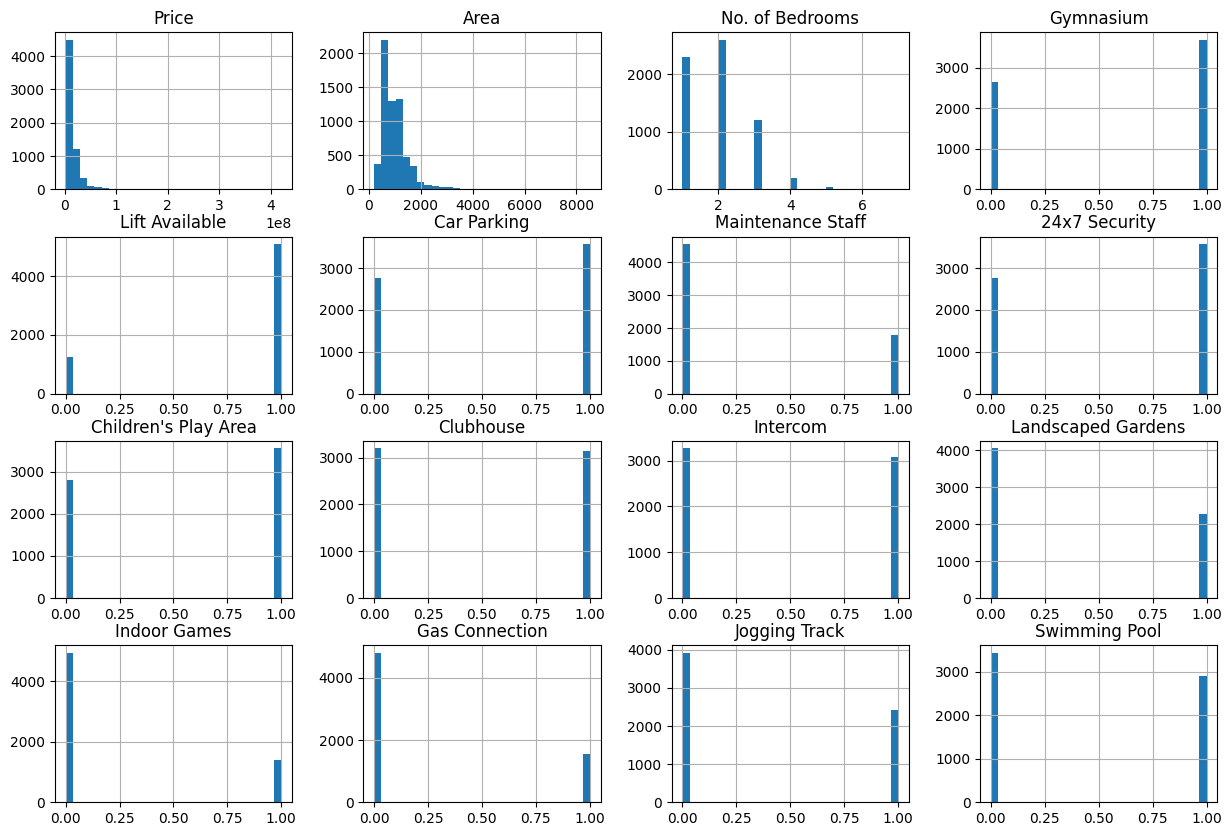

In [22]:
# histogram of each column
df.hist(bins = 30,figsize = (15,10))
plt.show()

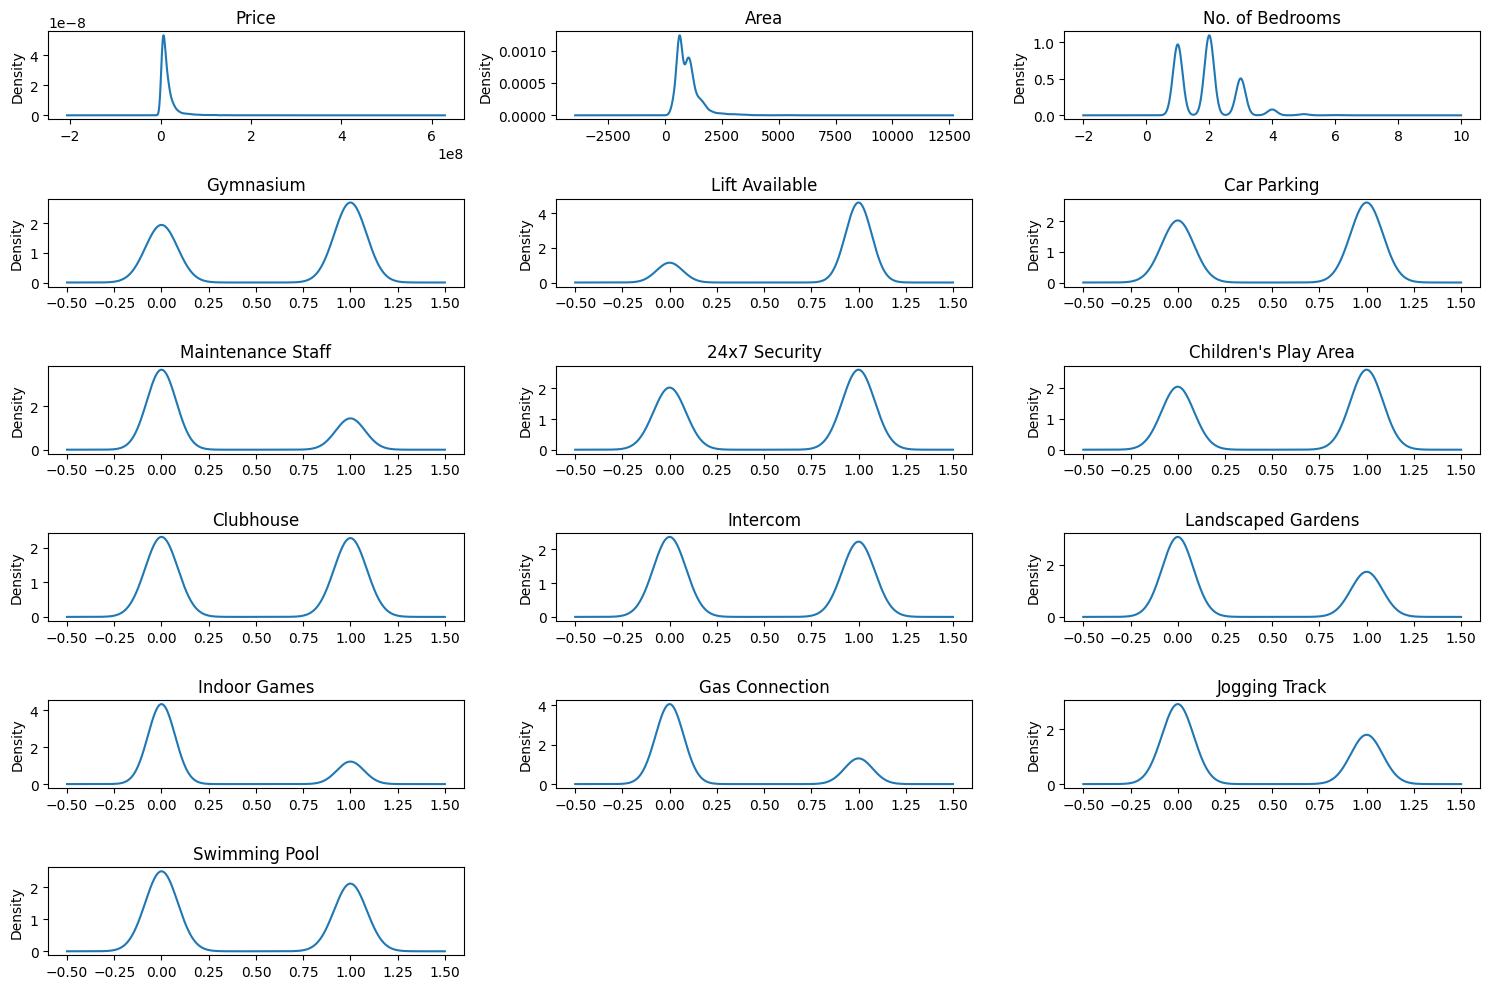

In [23]:
plt.figure(figsize=(15,10))

for i,col in enumerate(df.columns,1):
        plt.subplot(6,3,i)
        df[col].plot(kind = "kde")
        plt.title(col)

plt.tight_layout()
plt.show()

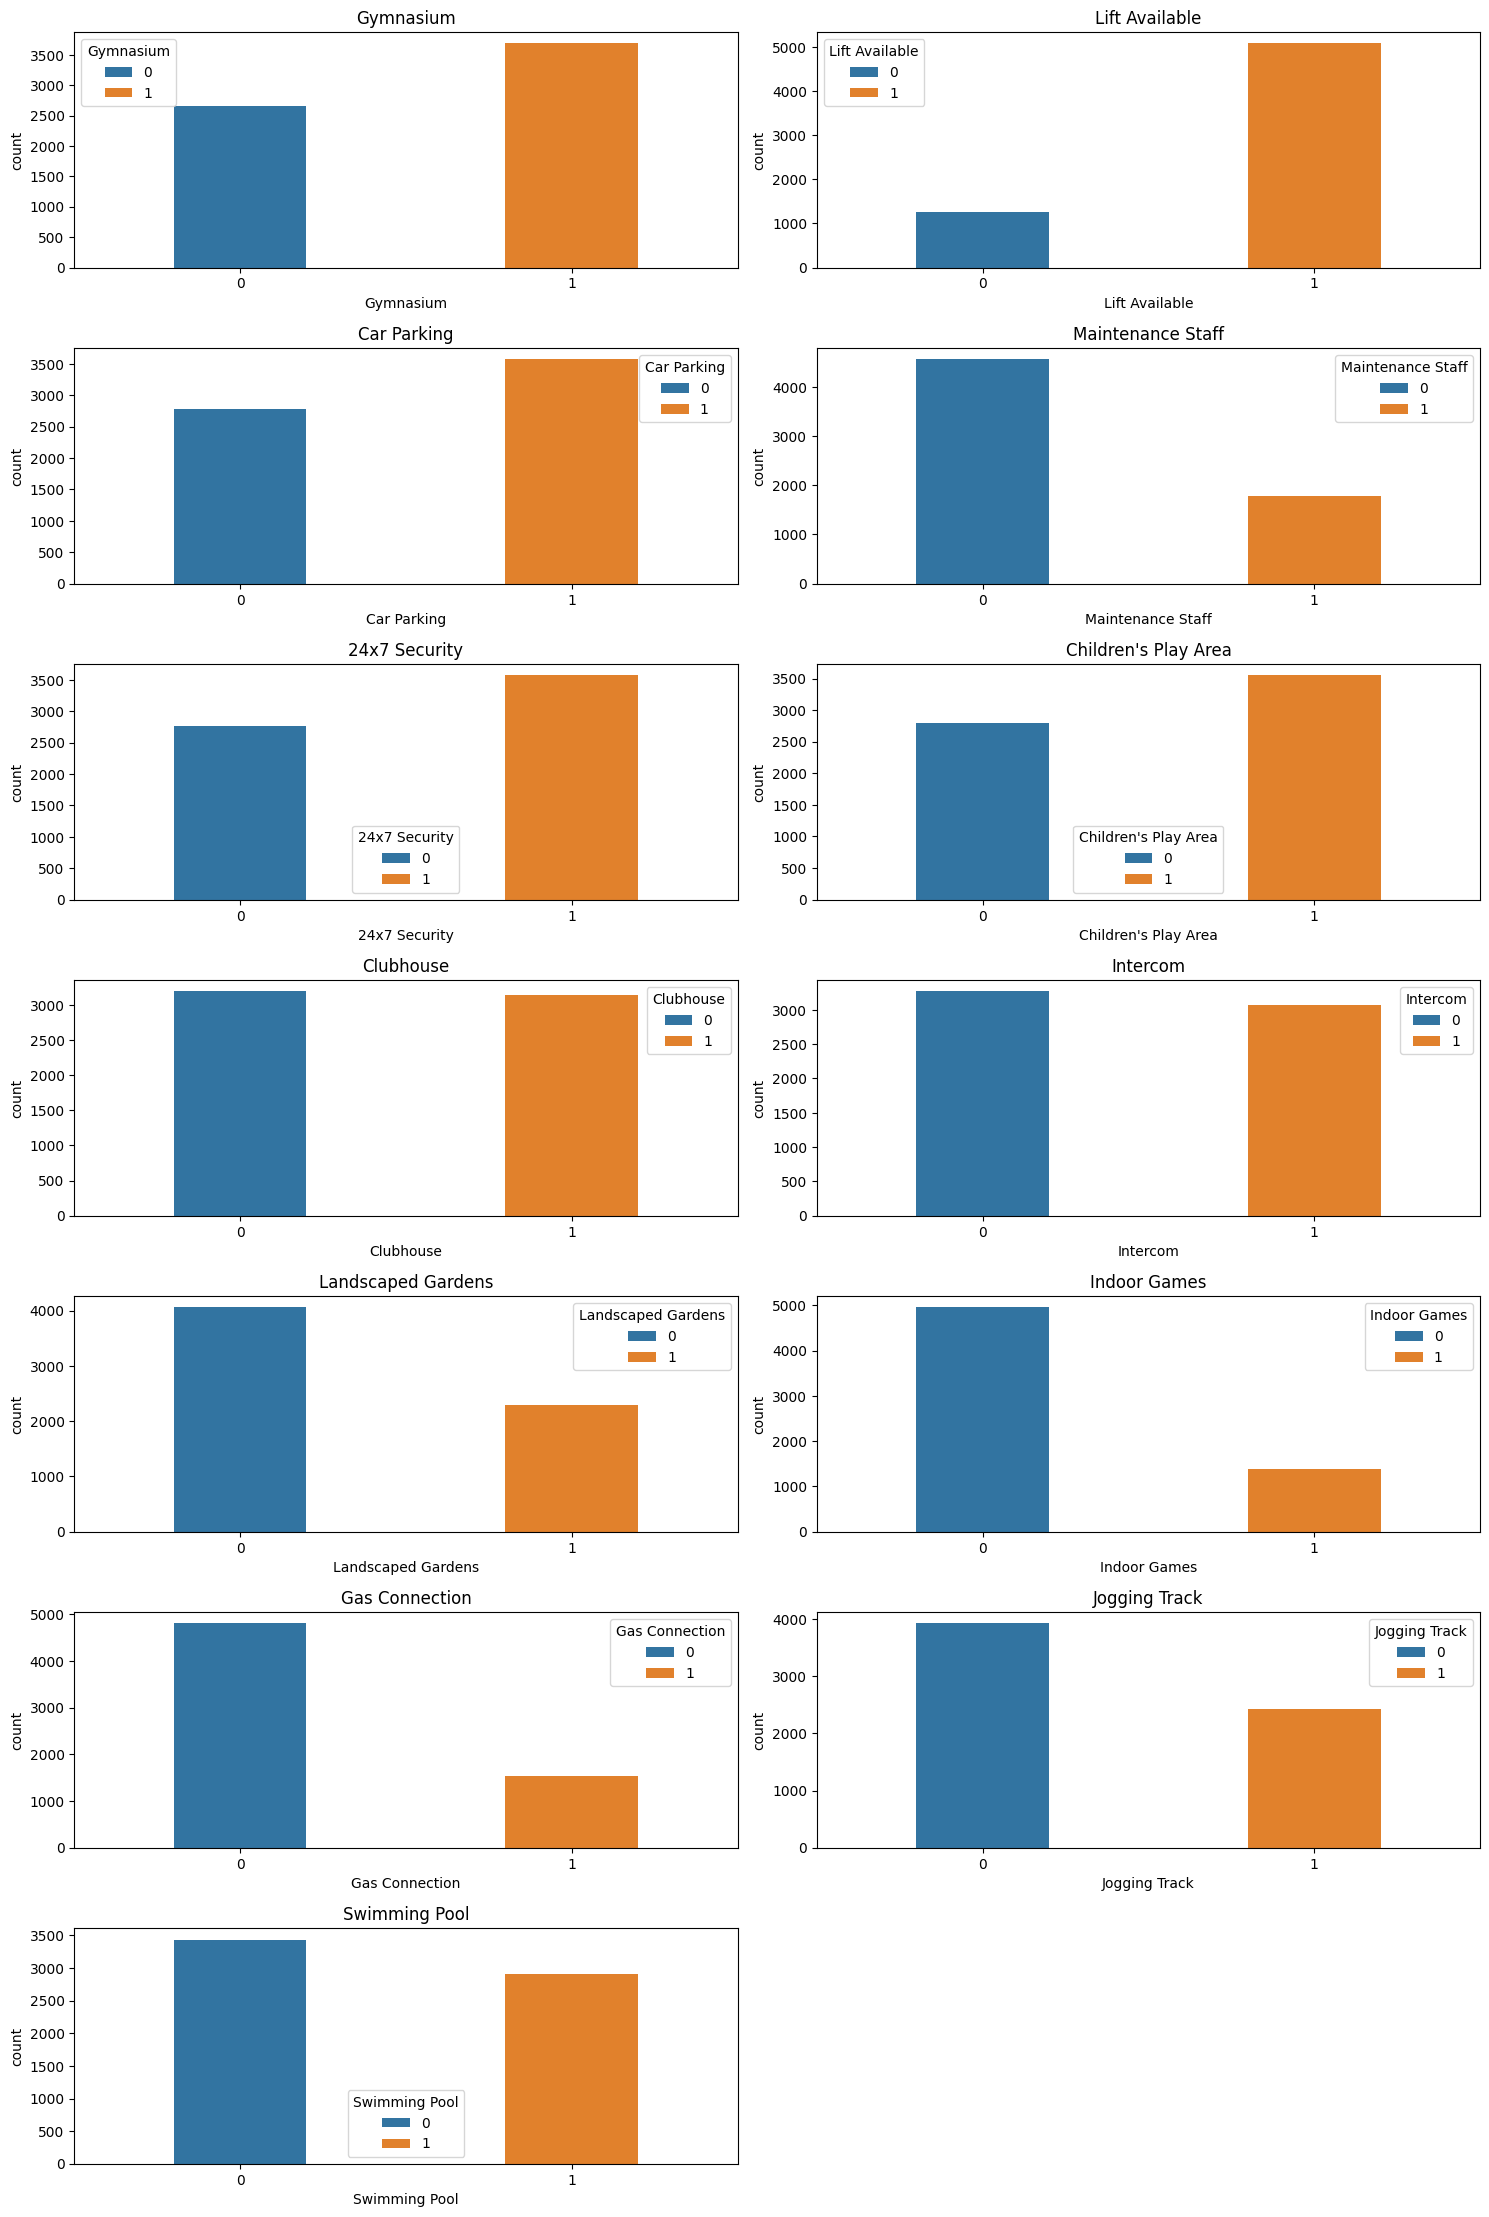

In [24]:
# checking counts of each column
plt.figure(figsize=(15,25))

for i,col in enumerate(df.columns[3:],1):
        plt.subplot(8,2,i)
        sns.countplot(data = df,x = df[col],hue = col,width = 0.4)
        plt.title(col)

plt.tight_layout()
plt.show()

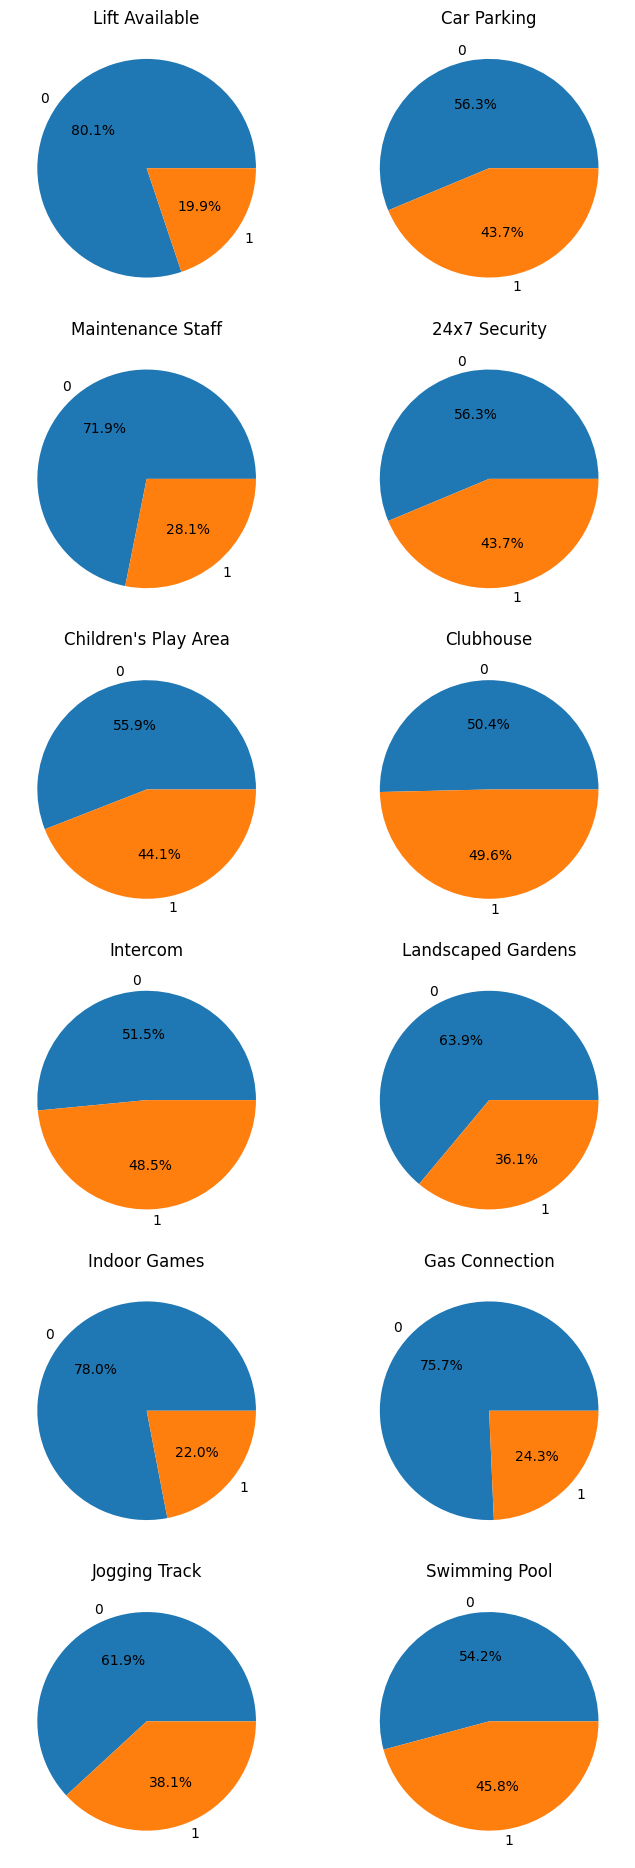

In [25]:
# checking value count in percentage
plt.figure(figsize=(7,25))

for i,col in enumerate(df.columns[4:],1):
        counts = len(df[col].value_counts())
        plt.subplot(8,2,i)
        plt.pie(df[col].value_counts(normalize = True), labels = np.arange(0,counts) , autopct = '%1.1f%%')
        plt.title(col)

plt.tight_layout()
plt.show()

In [26]:
df.head()

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,1,0,1,1,1,1,0,0,1,1,0,0,0,0


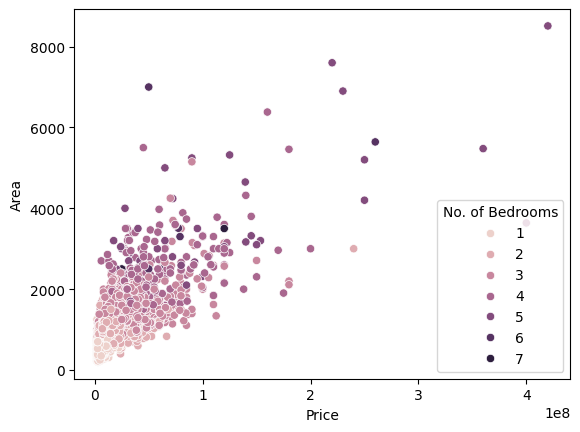

In [27]:
# checking the relation between price and area
sns.scatterplot(data = df,x = 'Price',y = 'Area',hue = 'No. of Bedrooms')
plt.show()

## Correlation 

In [28]:
df.corr()

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
Price,1.000000,0.722336,0.594865,0.098097,0.083656,0.055221,0.027604,0.045107,0.045126,0.084775,0.063060,0.082225,0.122352,0.118245,0.042325,0.123902
Area,0.722336,1.000000,0.812692,0.198772,0.112241,0.124060,0.091590,0.110156,0.107132,0.181121,0.145060,0.117309,0.151458,0.094251,0.121099,0.209696
No. of Bedrooms,0.594865,0.812692,1.000000,0.227887,0.104163,0.110182,0.047762,0.097672,0.113734,0.203105,0.144554,0.127684,0.175645,0.061616,0.126929,0.234695
Gymnasium,0.098097,0.198772,0.227887,1.000000,0.420770,0.332707,0.017514,0.382928,0.552648,0.756068,0.490203,0.423149,0.410831,0.098228,0.564443,0.722224
Lift Available,0.083656,0.112241,0.104163,0.420770,1.000000,0.259843,0.039136,0.258250,0.423847,0.407903,0.425870,0.280011,0.195335,0.205629,0.327393,0.341265
Car Parking,0.055221,0.124060,0.110182,0.332707,0.259843,1.000000,0.513232,0.805328,0.087365,0.282532,0.110477,0.417677,0.281009,-0.101906,0.467630,0.284575
Maintenance Staff,0.027604,0.091590,0.047762,0.017514,0.039136,0.513232,1.000000,0.477914,-0.190507,-0.041616,-0.088927,0.115207,0.026861,-0.111239,-0.011001,-0.078456
24x7 Security,0.045107,0.110156,0.097672,0.382928,0.258250,0.805328,0.477914,1.000000,0.141747,0.332720,0.151153,0.436198,0.319371,-0.101166,0.539561,0.332387
Children's Play Area,0.045126,0.107132,0.113734,0.552648,0.423847,0.087365,-0.190507,0.141747,1.000000,0.603074,0.585449,0.432697,0.417242,0.187151,0.527821,0.592932
Clubhouse,0.084775,0.181121,0.203105,0.756068,0.407903,0.282532,-0.041616,0.332720,0.603074,1.000000,0.557319,0.450821,0.463670,0.130183,0.622441,0.752771


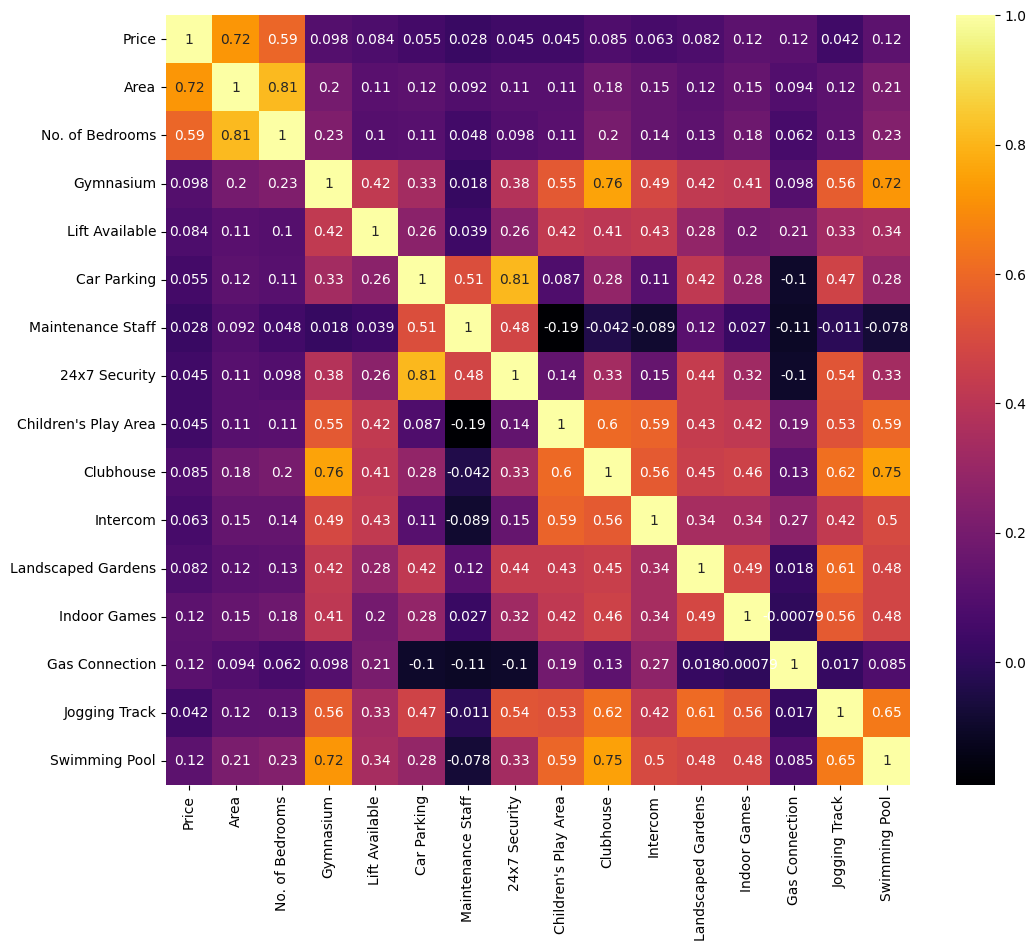

In [29]:
# checking relations using heatmap
corr_matrix = df.corr()  
plt.figure(figsize=(12, 10)) 
sns.heatmap(data=corr_matrix, annot=True,cmap = 'inferno') 
plt.show()


In [30]:
highly_correlated = []
threshold = 0.7

for col in corr_matrix.columns:
    for other_col in corr_matrix.columns[corr_matrix.columns != col]:
        correlation = corr_matrix.loc[col, other_col]  
        if abs(correlation) >= threshold: 
              highly_correlated.append((col, other_col))

print("Highly correlated features (absolute correlation >=", threshold, "):\n")
for pair in highly_correlated:
    print(pair)

Highly correlated features (absolute correlation >= 0.7 ):

('Price', 'Area')
('Area', 'Price')
('Area', 'No. of Bedrooms')
('No. of Bedrooms', 'Area')
('Gymnasium', 'Clubhouse')
('Gymnasium', 'Swimming Pool')
('Car Parking', '24x7 Security')
('24x7 Security', 'Car Parking')
('Clubhouse', 'Gymnasium')
('Clubhouse', 'Swimming Pool')
('Swimming Pool', 'Gymnasium')
('Swimming Pool', 'Clubhouse')


### Insight - 
These are the highly (greater than 0.7) correlated features :
- Price         <->   Area
- Area          <->   No. of Bedrooms
- Gymnasium     <->   Clubhouse
- Gymnasium     <->   Swimming Pool
- Car Parking   <->   24x7 Security
- Swimming Pool <->   Clubhouse

## Feature Engineering

In [31]:
# handling duplicate data
df.duplicated().sum()

99

In [32]:
df.drop_duplicates(inplace = True)

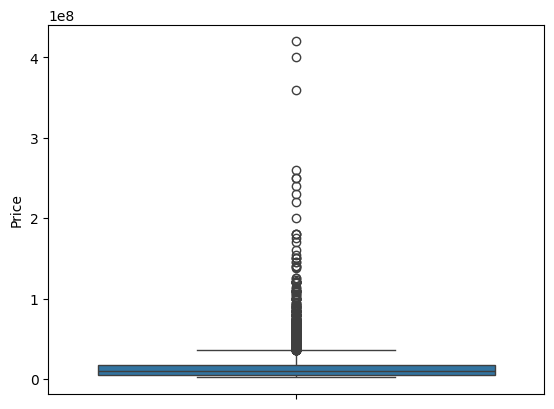

In [33]:
# handling outliers
sns.boxplot(df['Price'])
plt.show()

In [34]:
q1,q3 = np.quantile(df['Price'],[0.25,0.75])

In [35]:
q1,q3

(5300000.0, 17500000.0)

In [36]:
IQR = q3 - q1
IQR

12200000.0

In [37]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
lower_bound,upper_bound

(-13000000.0, 35800000.0)

In [38]:
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

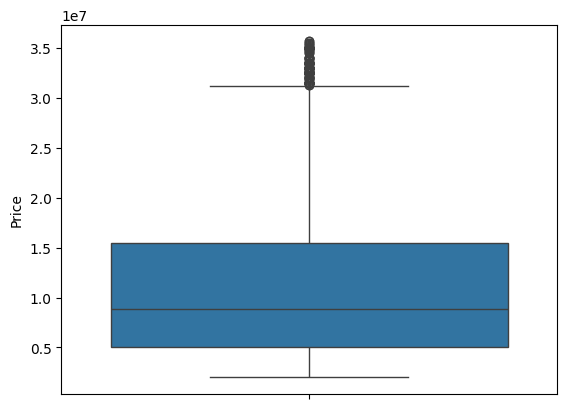

In [39]:
sns.boxplot(df['Price'])
plt.show()

In [40]:
df.head()

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,1,0,1,1,1,1,0,0,1,1,0,0,0,0


In [41]:
df.shape

(5784, 16)

In [42]:
df.reset_index(drop = True)

,Price,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,1,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,2485000,700,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5780,14500000,900,2,0,0,0,0,0,0,0,0,0,0,0,0,0
5781,14500000,900,2,0,1,0,0,0,0,0,1,0,0,1,0,0
5782,4100000,1380,3,0,0,0,0,0,0,0,0,0,0,0,0,0


## Divide the Dataset

In [43]:
# dividing dataset into independent and dependent feature
X = df.drop('Price',axis = 1)
y = df['Price']

In [44]:
X.shape,y.shape

((5784, 15), (5784,))

In [45]:
# divide the dataeset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [46]:
X_train.shape,X_test.shape

((4627, 15), (1157, 15))

In [47]:
y_train.shape,y_test.shape

((4627,), (1157,))

## Feature Scaling

In [48]:
scaler = StandardScaler()

In [49]:
scaler

StandardScaler()

In [50]:
# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [51]:
X_train_scaled

array([[-0.18607245,  0.26225186,  0.84819523, ..., -0.55413189,
         1.27164517,  1.088871  ],
       [-0.69472302, -1.06246361,  0.84819523, ...,  1.80462454,
         1.27164517,  1.088871  ],
       [ 0.06825284, -1.06246361, -1.17897385, ..., -0.55413189,
        -0.78638288, -0.91838243],
       ...,
       [-1.07621095, -1.06246361, -1.17897385, ..., -0.55413189,
        -0.78638288, -0.91838243],
       [ 0.34801065,  0.26225186,  0.84819523, ..., -0.55413189,
        -0.78638288,  1.088871  ],
       [-0.82188567, -1.06246361, -1.17897385, ..., -0.55413189,
        -0.78638288, -0.91838243]])

In [52]:
X_test_scaled

array([[ 3.34904904,  1.58696734,  0.84819523, ..., -0.55413189,
         1.27164517,  1.088871  ],
       [-0.60570917, -1.06246361, -1.17897385, ..., -0.55413189,
        -0.78638288, -0.91838243],
       [ 3.92128093,  1.58696734,  0.84819523, ...,  1.80462454,
         1.27164517,  1.088871  ],
       ...,
       [-0.66929049, -1.06246361, -1.17897385, ..., -0.55413189,
        -0.78638288, -0.91838243],
       [ 1.41617686,  1.58696734, -1.17897385, ..., -0.55413189,
        -0.78638288, -0.91838243],
       [-0.88292373,  0.26225186, -1.17897385, ..., -0.55413189,
        -0.78638288, -0.91838243]])

## Model Creation

In [53]:
regression = LinearRegression()

In [54]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [55]:
# intercept value
regression.intercept_

11101398.509185217

In [56]:
# slope
regression.coef_

array([ 1.84381179e+06,  3.27116667e+06,  9.43895605e+04, -7.35045355e+04,
        3.82411332e+04, -2.62821918e+05,  2.11578662e+05, -5.08295444e+05,
       -4.50670974e+05,  1.91146043e+03, -2.54937855e+05,  3.94649591e+05,
        1.18281791e+06, -3.02126629e+05,  7.48336900e+05])

## Model Prediction

In [57]:
# prediction of train and test data
y_train_pred = regression.predict(X_train_scaled)
y_test_pred = regression.predict(X_test_scaled)

In [58]:
y_train_pred,y_train

(array([11342803.26269384,  8428212.06614262,  7575840.90866436, ...,
         5465665.07874568, 12910497.90312382,  6177313.17888022]),
 409      6000000
 5185     9500000
 2680    12800000
 2627    10000000
 1696     4713000
           ...   
 4193     5999000
 5709     2700000
 5747     2150000
 5924     7200000
 925     15500000
 Name: Price, Length: 4627, dtype: int64)

In [59]:
y_test_pred,y_test

(array([22197556.02603374,  6333181.80882336, 25605984.79533407, ...,
         5514807.32059396, 17026592.24037838, 10155415.43761388]),
 4761    20000000
 3341     6500000
 3461    34500000
 4498     6000000
 158      6200000
           ...   
 3457     8000000
 209     13200000
 360      2492000
 900     30000000
 4629    12900000
 Name: Price, Length: 1157, dtype: int64)

## Model Performance

In [60]:
# Performance metrics
mse = mean_squared_error(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
rmse = np.sqrt(mae)

In [61]:
mse,mae,rmse

(30428899683901.61, 4163245.649790201, 2040.4033056702788)

## Model Accuracy

In [62]:
r2 = r2_score(y_test,y_test_pred)
n = len(y_test)
k = X_test.shape[1]
adj_re = 1-(1-r2)*(n-1)/(n-k-1)

In [63]:
r2,adj_re

(0.5172862012512793, 0.5109402705052402)

In [64]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [66]:
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_test_pred)
score = r2_score(y_test,y_test_pred)
print("MAE",mae)
print("R2 score",score)

MAE 4163245.649790201
R2 score 0.5172862012512793


In [67]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_test_pred)
score = r2_score(y_test,y_test_pred)
print("MAE",mae)
print("R2 score",score)

MAE 4163245.649790201
R2 score 0.5172862012512793
